In [1]:
import os
import gc
import numpy as np

from scipy.optimize import curve_fit
from obspy import UTCDateTime
from pandas import DataFrame, date_range

import matplotlib.pyplot as plt

In [2]:
from functions.load_mlti import __load_mlti
from functions.get_mlti_intervals import __get_mlti_intervals
from functions.mlti_intervals_to_NaN import __mlti_intervals_to_NaN

In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/ontap-ffb-bay200/'
    lamont_path = '/home/andbro/lamont/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/import/ontap-ffb-bay200/'
    lamont_path = '/lamont/'
elif os.uname().nodename in ['lin-ffb-01', 'ambrym', 'hochfelln']:
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/import/ontap-ffb-bay200/'
    lamont_path = '/lamont/'

In [4]:
config = {}

config['camera'] = "07"

config['path_to_data'] = data_path+f"ids/data{config['camera']}/"

config['path_to_outdata'] = data_path+f"ids/data{config['camera']}/"

config['path_to_figures'] = data_path+"ids/figures/"

# experiment 1
# config['date1'] = "2024-05-02"
# config['date1'] = "2024-05-22"

# experiment 2 (after readjustment)
config['date1'] = "2024-05-23"
config['date2'] = "2024-06-22"
# config['date2'] = "2024-07-28"

# experiment 3 (after readjustment)
config['date1'] = "2024-08-02"
config['date2'] = UTCDateTime.now().date

# after reconfiguration
config['date1'] = "2024-08-06"
config['date2'] = UTCDateTime.now().date


In [5]:
mlti = __load_mlti(config['date1'], config['date2'], "V", archive_path)
mlti_t1, mlti_t2 = __get_mlti_intervals(mlti.time_utc)

In [6]:
def __load_beam_wander_data(tbeg, tend, path_to_data):

    from obspy import UTCDateTime
    from datetime import date
    from pandas import read_pickle, concat, DataFrame, date_range, to_datetime

    t1 = date.fromisoformat(str(UTCDateTime(tbeg).date))
    t2 = date.fromisoformat(str((UTCDateTime(tend)).date))

    df = DataFrame()
    for dat in date_range(t1, t2):
        print(str(dat)[:10])
        file = f"{str(dat)[:10].replace('-','')}.pkl"
        try:
            df0 = read_pickle(path_to_data+file)
            df = concat([df, df0])
        except:
            print(f"error for {file}")

    # remove NaN from time column
    df.dropna(subset=['time'], inplace=True)

    # reset the index column
    df.reset_index(inplace=True, drop=True)

    # add column for relative time in seconds
    df['time_sec'] = [UTCDateTime(_t) - UTCDateTime(df.time.iloc[0]) for _t in df.time]

    return df

In [7]:
df = __load_beam_wander_data(config['date1'], config['date2'], config['path_to_data'])

2024-08-06
error for 20240806.pkl
2024-08-07
2024-08-08
2024-08-09
2024-08-10
2024-08-11
2024-08-12
2024-08-13
2024-08-14
2024-08-15
2024-08-16
2024-08-17
2024-08-18
2024-08-19
2024-08-20
2024-08-21
2024-08-22
2024-08-23
2024-08-24
2024-08-25
2024-08-26
2024-08-27
2024-08-28
2024-08-29
2024-08-30
2024-08-31
2024-09-01
2024-09-02
2024-09-03
2024-09-04
2024-09-05
2024-09-06
2024-09-07
2024-09-08
2024-09-09
error for 20240909.pkl


In [8]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,x_var,y_var,amp_var,y_sig_var,x_sig_var,theta_var,offset_var,time_sec
0,2024-08-07T09:31:07.000000Z,586.051489,90.289893,586.0,90.0,6.322724,140.873774,328.840830,1.213526e-01,0.044473,0.024369,0.596026,0.000025,0.354121,0.013423,6.559083e-07,1.512892e-06,0.0
1,2024-08-07T09:43:07.000000Z,671.575636,373.209920,671.0,373.0,383.548165,339.728323,398.057953,1.956009e+00,-66.840402,0.025090,0.028159,0.094481,0.186101,0.158929,5.034899e-06,1.268374e-01,720.0
2,2024-08-07T09:54:07.000000Z,619.757051,416.752471,619.0,416.0,23.124562,94.980285,102.307364,7.794237e-27,0.321567,0.001049,0.001217,0.000062,0.001286,0.001109,1.050628e-05,8.876949e-07,1380.0
3,2024-08-07T09:55:07.000000Z,620.252602,424.779215,620.0,424.0,20.302212,86.715639,81.819614,4.353745e+00,0.006942,0.000548,0.000598,0.000033,0.000561,0.000631,1.192999e-05,3.266219e-07,1440.0
4,2024-08-07T10:01:07.000000Z,620.138752,422.899690,620.0,422.0,21.201148,88.060439,82.829660,1.231933e+00,0.028420,0.000571,0.000628,0.000037,0.000586,0.000662,1.093138e-05,3.742105e-07,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,2024-09-08T23:17:07.000000Z,543.953058,437.746635,544.0,437.0,331.384763,124.314532,120.884284,4.293575e+00,0.849714,0.001252,0.001299,0.009317,0.001365,0.001442,5.417030e-05,2.348434e-04,2814360.0
4689,2024-09-08T23:29:06.000000Z,543.960588,437.755595,544.0,437.0,331.354480,124.010044,120.646550,7.426827e+00,0.806728,0.001244,0.001290,0.009295,0.001355,0.001431,5.597020e-05,2.328462e-04,2815079.0
4690,2024-09-08T23:32:07.000000Z,543.971608,437.714902,544.0,437.0,331.349050,124.051426,120.647905,1.057232e+01,0.812101,0.001243,0.001289,0.009284,0.001354,0.001431,5.461831e-05,2.326865e-04,2815260.0
4691,2024-09-08T23:40:07.000000Z,543.934069,437.698797,544.0,437.0,331.323958,120.893518,124.313708,2.719694e+00,0.857802,0.001251,0.001298,0.009308,0.001441,0.001364,5.445799e-05,2.346281e-04,2815740.0


### Remove MLTI times

In [9]:

# local time to utc (! correct only in winter)
df['time_utc'] = [UTCDateTime(tl)-3600 for tl in df.time]


# pixel to length
conversion_factor = 5.3e-3 # mm / pixel

keys_to_convert = ["y_idx", "x_idx", "y", "x"]

for k in keys_to_convert:
    df[k] *= conversion_factor

# turn times with MLTI to NaN
df = __mlti_intervals_to_NaN(df, "y_idx", "time_utc", mlti_t1, mlti_t2, t_offset_sec=180)
df = __mlti_intervals_to_NaN(df, "x_idx", "time_utc", mlti_t1, mlti_t2, t_offset_sec=180)


### Remove artefacts

In [10]:
# remove corrupt values
df = df[df['y_sig_var'] != np.inf]

# when intensity is super low, there is a black image
df = df[df['amp'] > 20]

# when intensity is super high or saturated, there is likely a MLTI boost
df = df[df['amp'] < 255]

### Plotting

In [11]:
from functions.reduce import __reduce

In [12]:
df['x_um_rel'] = __reduce(df.x, 10) * 1e3
df['y_um_rel'] = __reduce(df.y, 10) * 1e3

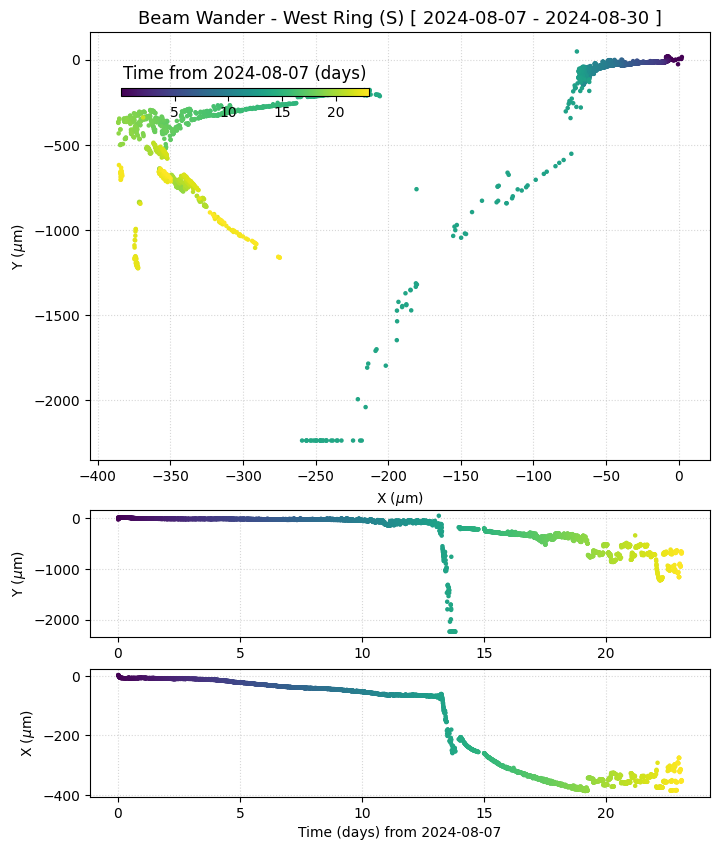

In [13]:
def __makeplot_beam_wander(df0):

    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    time_scaling = 1/86400

    Ncol, Nrow = 2, 6

    font = 12

    fig = plt.figure(figsize=(8, 12))

    gs1 = GridSpec(Nrow, Ncol, figure=fig, hspace=0.7)
    gs2 = GridSpec(Nrow, Ncol, figure=fig)

    ax1 = fig.add_subplot(gs1[0:3, :])

    ax2 = fig.add_subplot(gs2[3, :])
    ax3 = fig.add_subplot(gs2[4, :])

    plt.subplots_adjust(hspace=0.25)

    # ax1.scatter(df0.x_idx, df0.y_idx, c=df0.time_sec*time_scaling, s=5, zorder=2)
    # cb = ax1.scatter(df0.x, df0.y, c=df0.time_sec*time_scaling, s=5, zorder=2)
    cb = ax1.scatter(df0.x_um_rel, df0.y_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)

    # ax2.scatter(df0.time_sec*time_scaling, df0.y, c=df0.time_sec*time_scaling, s=5, zorder=2)
    # ax3.scatter(df0.time_sec*time_scaling, df0.x, c=df0.time_sec*time_scaling, s=5, zorder=2)
    ax2.scatter(df0.time_sec*time_scaling, df0.y_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)
    ax3.scatter(df0.time_sec*time_scaling, df0.x_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)

    ax1.set_ylabel("Y ($\mu$m)")
    ax1.set_xlabel("X ($\mu$m)")

    ax2.set_ylabel("Y ($\mu$m)")
    # ax2.set_xlabel(f"Time (days) from {str(df.time_utc.iloc[0])[:10]}")

    ax3.set_ylabel("X ($\mu$m)")
    ax3.set_xlabel(f"Time (days) from {str(df.time_utc.iloc[0])[:10]}")

    for ax in [ax1, ax2, ax3]:
        ax.grid(ls=":", alpha=0.5, zorder=0)

    # x1, x2 = 3.44, 3.52
    # y1, y2 = 1.62, 1.66
    x1, x2 = -5, 10
    y1, y2 = -20, 20
    # ax1.set_xlim(x1, x2)
    # ax1.set_ylim(y1, y2)
    # ax2.set_ylim(y1, y2)
    # ax3.set_ylim(x1, x2)

    # add title
    ax1.set_title(f"Beam Wander - West Ring (S) [ {df0.time_utc.iloc[0].date} - {df0.time_utc.iloc[-1].date} ]", fontsize=font+1)

    # add colorbar
    cax1 = ax1.inset_axes([0.05, 0.85, 0.4, 0.02])
    cb5 = plt.colorbar(cb, ax=ax1, cax=cax1, orientation="horizontal")
    cb5.set_label(f"Time from {df0.time_utc.iloc[0].date} (days)", fontsize=font, labelpad=-40)


    plt.show();
    return fig

fig = __makeplot_beam_wander(df)

fig.savefig(config['path_to_figures']+f"BeamWander_RV_IDS{config['camera']}_{config['date1']}_{config['date2']}.png", format="png", dpi=150, bbox_inches='tight')


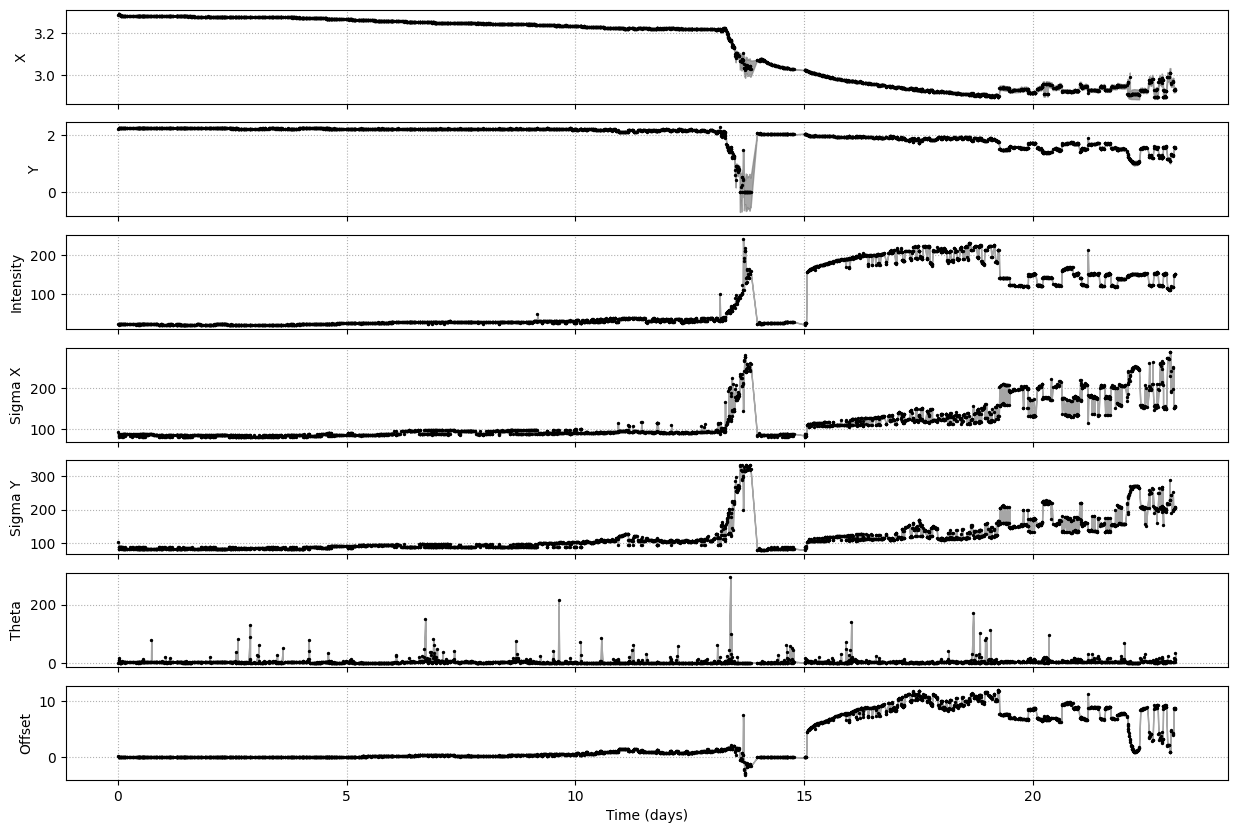

In [14]:
def __makeplot():

    Nrow, Ncol = 7, 1

    font = 12
    size = 2
    tscale = 1/86400

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 10), sharex=True)

    ax[0].fill_between(df.time_sec*tscale, df.x-df.x_var, df.x+df.x_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[0].scatter(df.time_sec*tscale, df.x, s=size, zorder=2, color="k")
    # ax[0].set_ylim(3.42, 3.75)
    ax[0].set_ylabel("X")

    ax[1].fill_between(df.time_sec*tscale, df.y-df.y_var, df.y+df.y_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[1].scatter(df.time_sec*tscale, df.y, s=size, zorder=2, color="k")
    # ax[1].set_ylim(1.58, 1.69)
    ax[1].set_ylabel("Y")

    ax[2].fill_between(df.time_sec*tscale, df.amp-df.amp_var, df.amp+df.amp_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[2].scatter(df.time_sec*tscale, df.amp, s=size, zorder=2, color="k")
    # ax[2].set_ylim(110, 130)
    ax[2].set_ylabel("Intensity")

    ax[3].fill_between(df.time_sec*tscale, df.x_sig-df.x_sig_var, df.x_sig+df.x_sig_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[3].scatter(df.time_sec*tscale, df.x_sig, s=size, zorder=2, color="k")
    # ax[3].set_ylim(511, 518)
    ax[3].set_ylabel("Sigma X")

    ax[4].fill_between(df.time_sec*tscale, df.y_sig-df.y_sig_var, df.y_sig+df.y_sig_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[4].scatter(df.time_sec*tscale, df.y_sig, s=size, zorder=2, color="k")
    # ax[4].set_ylim(480, 495)
    ax[4].set_ylabel("Sigma Y")

    ax[5].fill_between(df.time_sec*tscale, df.theta-df.theta_var, df.theta+df.theta_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[5].scatter(df.time_sec*tscale, df.theta, s=size, zorder=2, color="k")
    # ax[5].set_ylim(0.4, 0.55)
    ax[5].set_ylabel("Theta")

    ax[6].fill_between(df.time_sec*tscale, df.offset-df.offset_var, df.offset+df.offset_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[6].scatter(df.time_sec*tscale, df.offset, s=size, zorder=2, color="k")
    # ax[6].set_ylim(8.5, 11.5)
    ax[6].set_ylabel("Offset")

    ax[6].set_xlabel("Time (days)")

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        # ax[_n].legend(loc=1)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figures']+f"BeamWander_RZ_IDS{config['camera']}_parameters_{config['date1']}_{config['date2']}.png", format="png", dpi=150, bbox_inches='tight')
